## Graph Neural Networks 

### Process Data as Graphs 
- Process the information as nodes and edges/links. Based on the ordering of these nodes and graphs, we get different inputs. --> We can translate an ordeirng of graph into a tabular/picture input  

### Problems with processing graphs with traditional neural networks 
- Graphs are of different sizes (edges or nodes), and we can't change their size easily through padding/deletion like what we did with picture/tabular data. So traditional NN can't process graph data as easily   

- Graphs have the property of isomorphism. Two structurally same graphs (same number of nodes and edges but at different ordering) maybe processed by the neural network as different inputs when they are the same input (i.e. a rotated picture). So graph NN needs to be permutation invariant  
   
- Graph data are also not the same as tabular data that is based on a grid because graphs are non-euclidean. This makes hard to use traditional ML techniques such as convolution which only works on tabular data. 

### GNN and Message Passing 
- Uses embedding layers to embed nodes and edges --> embeded nodes and edges have information about other nodes/edges or the entire graph   
  
- With the embedded values/vectors, we can use the embedding to predict the nodes and edges of the entire graph   
  
- The hidden layers are known as Message Passing layers (passing information about other nodes/edges to other nodes). The specific implementation of these layers are done using Graph Convolution Network.   
  
- Similar with CNN convolutions, **graph convolution/message passing** determines a node neighborhood of certain size. Then we can take the embedded information of all those neighbors with the current node. Combine the information of neighbor nodes then add with the current node to get the new embedding information   
  
- Each convolution/message passing only looks at one neighborhood, after the first passing, each node **will have information about at least 1 other nodes** (assume we don't have an isolated node). And it's possible for two nodes to not have any information about each other. After repeating the message passing layers, the nodes will have more information about all other nodes.  (Starting from direct neighor to neighbor's neighbors)
  
- The embedding of the nodes are vectors containing information about other nodes and itself (think of embedding in transformers). The number of message passing we do is the number of hidden layers of a GNN   
  
- If we have too many message passing layers, the nodes may learn too much information about the neighbors, and the nodes become similar to each other (**over smoothing**), this leads to information loss    
  
- Message Passing: $$h_u^{k+1} = update(h_u + aggregrate(h_v   \forall v \in u_{neighbor}))$$  
- Variants of GNN varies in how the message passing updates the current node's information 

In [3]:
import torch 
import sys
import os
from torch_geometric.datasets import MoleculeNet 
import rdkit 
from rdkit import Chem 

ESOL dataset is consisted of molecules in their SMILES strings and graph representations (nodes and edges) and their solubility.  

**Note** that Pytorch Geometric uses RDKit at processing these datasets. So the node and attribute information are most likely extracted using RDKit in the background. 

In [5]:
data= MoleculeNet(root='.', name= "ESOL")
data 

Processing...
Done!


ESOL(1128)

In [ ]:
print("Dataset type: ", type(data))
print("Dataset features: ", data.num_features)
print("Dataset target: ", data.num_classes)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])  
print("Sample  nodes: ", data[0].num_nodes) 
print("Sample  edges: ", data[0].num_edges)

# each sample of the data is a molecule containing its nodes with attributes (numerical values) predicting for one label 
# edge_index is alike the adjacency matrix that tells the connection between nodes. The first row is the node and the second row is the other node the corresponding node is connected to 
# edge_attr is 

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  734
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])
Sample  nodes:  32
Sample  edges:  68


/opt/anaconda3/envs/newEnv/lib/python3.12/site-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


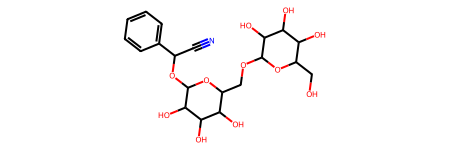

In [ ]:
# process the first data of the dataset 
mol = Chem.MolFromSmiles("OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O")   # rdkit 
mol 

In [ ]:
data[0].x   # returns the 32 nodes each with an embedding/attribute dimension of 9 

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [ ]:
# edge connections 
data[0].edge_index.t()  # take the transpose to show the connection more clearly 

# edge_index is more efficient than a regular adjency matrix because of less space usage 

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [ ]:
data[0].y   # the ground truth label for the corresponing graph. 

# In this context, the ground truth is the solubility of a given molecule (this is a grpah level prediction task)

tensor([[-0.7700]])

### Implementation of Graph Convolution Network    
- Similar implementation as a CNN   

In [17]:
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
import torch.nn as nn 

In [ ]:
embedding_size= 64 
class GCN (nn.Module):
    def __init__(self): 
        super().__init__()  

        # GCN layers 
        self.initial_conv= GCNConv(data.num_features, embedding_size)   # embed the dimension of each node from initial information to embedding size 
        self.conv1= GCNConv(embedding_size, embedding_size) # same convolution size at the embedding 
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv3 = GCNConv(embedding_size, embedding_size)

        # output to a single prediction 
        self.out = nn.Linear(embedding_size*2, 1)   # output to  1 to match with the label size 
    # x is the input nodes 
    # edge_index corresponds to the nodes that are connected (we need edge_index to find the nearest edge to do the convolution) 
    def forward(self, x, edge_index, batch_index):
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)

         # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)

        # mean pool and max pool after 3 times of message pooling
        # concatenate column wise 
        hidden= torch.cat([gmp(hidden, edge_index),gap(hidden,edge_index)], dim=1 )
        out = self.out (hidden)
        return out, hidden 
    
model= GCN() 
print(model)
for p in model.parameters(): 
    print("Element parameters:", p.numel())

# 64 parameters came from the initial 9 -> 64 

# 64 parameters from tanh after conv 2  
# 4096 parameters came from conv3 
# 128 parameters because out hidden is 128 dimensional (concatenated)
# 1 parameter is the bias of the linear 

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Element parameters: 64
Element parameters: 576
Element parameters: 64
Element parameters: 4096
Element parameters: 64
Element parameters: 4096
Element parameters: 64
Element parameters: 4096
Element parameters: 128
Element parameters: 1
